# _Main Project_



In [3]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

_This project will help doctors determine a patient's risk of Diabetes_


In [4]:
diabetes = pd.read_csv('./Data/diabetes.csv')
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Exploratory Data Analysis

In [5]:
#insert correlation heatmap here
corr = diabetes.corr()
corr_rounded = np.round(corr, 2)

import plotly.express as px
fig = px.imshow(corr_rounded, text_auto = True)

fig.update_layout(
    width = 500, 
    height = 500,
    title_text = 'Correlation Heatmap of Data'
)
fig.show()

A heatmaps main purpose is to display the correlation between features in a dataset. If you look above you are able to see all the features: Glucose, BMI, etc. and their correlation to the outcome. 

*which features have a highest correlation? which features have the lowest? how does this impact which features you choose to use in your models?*



In [6]:
dft = pd.read_csv("./Data/diabetes.csv")
fig7 = px.scatter(dft, x="BMI", y="Glucose", title = "How High Glucose Levels Lead to a High Risk of Diabetes", color='Outcome')
fig7.show()

_This visualization shows the correlation between high levels of Glucose combined with an above\-average BMI contributing to whether or not a patient has Diabetes._


In [7]:
fig = px.scatter(diabetes, x = 'Glucose', y = 'Outcome')
fig.show()

This visualization shows that the higher the amount of Glucose that is present, the chances of Diabetes rises.



In [10]:
fig = px.scatter(diabetes3, x = 'Glucose', y = 'Insulin')
fig.show()

_This graph shows that Glucose and Insulin are typically in relation to one another. If one of the two values rise, the second value is most likely going to stay with it_ with a few exceptions.



In [0]:
# can include more visualizations :)

### Machine Learning Models

#### Logistic Regression

_Logistic regression is used to find the outcome based on prior observation, We are using logistic regression for finding what has the highest probability of being correct._



In [9]:
diabetes2 =diabetes[diabetes['Insulin'] < 600]
diabetes3=diabetes2[diabetes2['Insulin'] > 0]
diabetes3

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
14,5,166,72,19,175,25.8,0.587,51,1
...,...,...,...,...,...,...,...,...,...
753,0,181,88,44,510,43.3,0.222,26,1
755,1,128,88,39,110,36.5,1.057,37,1
760,2,88,58,26,16,28.4,0.766,22,0
763,10,101,76,48,180,32.9,0.171,63,0


In [15]:
from sklearn.model_selection import train_test_split
X = diabetes3[['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction', 'Insulin','BloodPressure', 'Pregnancies', 'SkinThickness']]
y = diabetes3[['Outcome']]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=42) 

In [16]:
from sklearn.linear_model import LogisticRegression


lr = LogisticRegression()


lr.fit(X_train, y_train)


y_pred = lr.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy2 = accuracy*100
accuracy3 = round(accuracy2, 1)
print('Accuracy of test set: ', accuracy3, '%')

Accuracy of test set:  84.6 %


#### k-Nearest Neighbors



_k\-Nearest Neighbors works by_ finding the distances between a query and points in a dataset and classifying the query based on the data points closest to the query.


In [18]:

#first, we split up our feature and target variables
X = diabetes3[['Glucose','Pregnancies','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].to_numpy() #REPLACE THIS CODE with feature variables
y = diabetes3[['Outcome']].to_numpy()

In [33]:
from sklearn.neighbors import KNeighborsClassifier

#set a variable equal to the k-nn object
neigh = KNeighborsClassifier(n_neighbors=47) #number of neighbors should always be odd so that there isn't a tie!

#fit the model to the training data using .fit(X_train, y_train)
neigh.fit(X_train, y_train)

#predict using the test set using .predict(X_test)
train_pred=neigh.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, train_pred)
print(round(accuracy,4)*100,'%')

85.9 %


[9]
0.8461538461538461
0.8205128205128205


0.8461538461538461

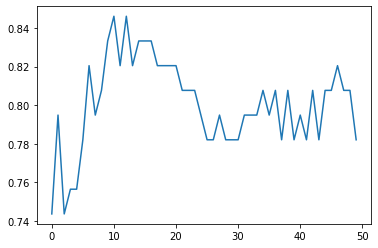

In [20]:
l=[]
for i in range(1,51):
    from sklearn.neighbors import KNeighborsClassifier
    neigh = KNeighborsClassifier(n_neighbors=i) 
    neigh.fit(X_train, y_train)
    train_pred=neigh.predict(X_test)
    from sklearn.metrics import accuracy_score
    accuracy = accuracy_score(y_test, train_pred)
    l.append(accuracy)
plt.plot(l)
print([9])
print(l[10])
print(l[11])
max(l)

In [21]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, train_pred)
accuracy

0.782051282051282

In [25]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, y_pred)
fig = px.imshow(cf, text_auto = True)
fig.show()

#### Random Forest

*In one or two sentences, explain how random forests work!*



In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

diabetes2 =diabetes[diabetes['Insulin'] < 600]

In [29]:
from sklearn.model_selection import train_test_split
X = diabetes3[['Glucose', 'BMI', 'Age','DiabetesPedigreeFunction']]
y = diabetes3[['Outcome']]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=42) 

In [30]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

In [31]:
accuracy_rf = accuracy_score(y_test,y_pred)
print("Accuracy score:", accuracy_rf*100, "%")

Accuracy score: 80.76923076923077 %


In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

cf = confusion_matrix(y_test, y_pred)
fig = px.imshow(cf, text_auto = True)

fig.update_layout(
    title_text = 'Confusion Matrix of Random Forest',
    xaxis={'title': 'Predicted Values'}, 
    yaxis={'title': 'Actual Values'}
)

### Conclusion

which model performed the best? (highest accuracy? lowest error rate?) 

what were some limitations that we had in this project? (look at product spec)

what now? -- how can we apply this to the real world? what further research could be done?

*write conclusion here*

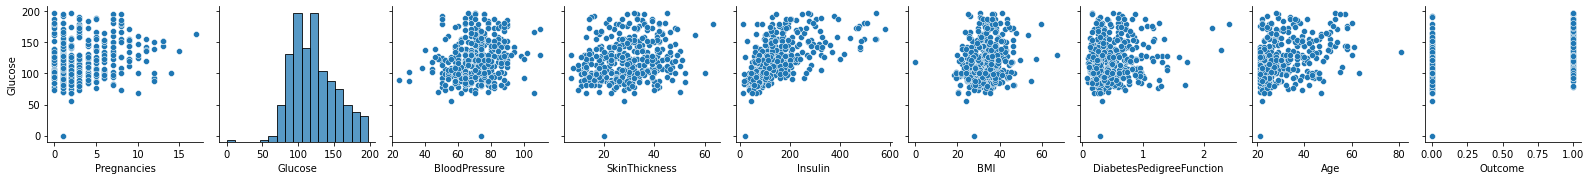

In [21]:
sns.pairplot(
    diabetes3,
    y_vars=['Glucose'])

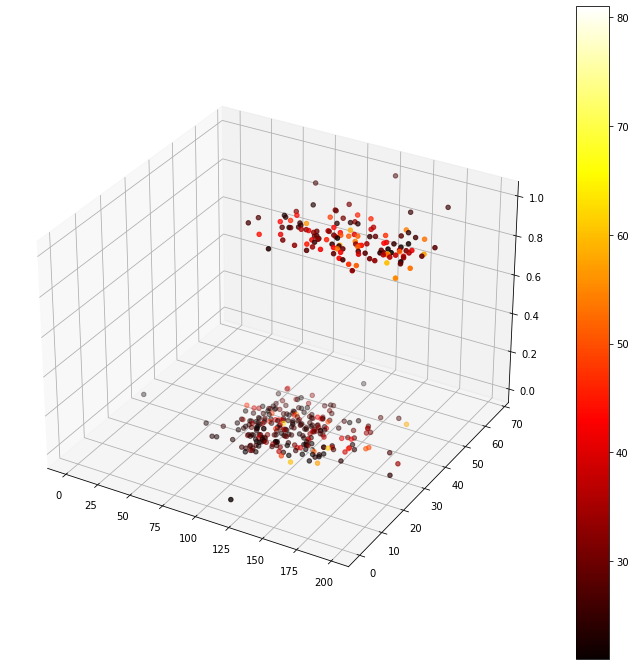

In [22]:
fig = plt.figure(figsize=(12,12))
ax=fig.add_subplot(projection='3d')
img=ax.scatter(diabetes3['Glucose'],diabetes3['BMI'],diabetes3['Outcome'],c=diabetes3['Age'],cmap=plt.hot())
fig.colorbar(img)
plt.show()